In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_json('/content/drive/MyDrive/Копия client_dataset.json')

In [ ]:
data.head(3)

,position,age,country,city,key_skills,client_name,grade_proof,salary,work_experience
0,"""программист"" (по факту аналитик), отдел проек...",34,Россия,Барнаул,"Анализ требований, Разработка ТЗ, Управление т...",ТОП Финтех,не подтверждён,Вероника претендует на Грейд 2 (Остальные реги...,"2013-12-01 - : ""программист"" (по факту аналити..."
1,(Повышение) Инженер отдела управления инфрастр...,35,Россия,Калининград,Организация обработки конфиденциальной информа...,"ТОП IT (сервисы, интеграторы)",не подтверждён,"Минимум 200 (net, без учёта премий), комфорт 2...",2017-06-01 - 2018-05-01: Начальник отдела инфо...
2,(Повышение) Инженер отдела управления инфрастр...,35,Россия,Калининград,Организация обработки конфиденциальной информа...,ТОП Телеком,не подтверждён,"Минимум 200 (net, без учёта премий), комфорт 2...",2017-06-01 - 2018-05-01: Начальник отдела инфо...


In [ ]:
data['country'].unique()

array(['Россия', 'Израиль', 'Турция', 'Великобритания', 'Кипр',
       'Казахстан', 'Таджикистан', 'Грузия', '', 'Беларусь', 'Армения',
       'Белоруссия', 'Узбекистан', 'Республика Беллорусия', 'Кыргистан',
       'Вьетнам', 'Республика Беларусь', 'Киргизия', 'Молдова', 'Russia',
       'Сербия', '1', 'Азербайджан', 'Испания', 'Молдавия', 'Бразилия',
       'Таиланд', 'Кыргызстан', 'ОАЭ', 'Португалия', 'Нидерланды',
       'Мексика', 'Латвия', 'Кыргызстаня', 'Georgia', 'Israel', 'Литва',
       'Малайзия', 'Тайланд', 'Шри Ланка', 'Чехия', 'Франция', 'россия',
       'Украина', 'Дубаи', 'Черногория', 'Аргентина', 'Индонезия',
       'Бельгия', 'Парагвай', 'Саудовская Аравия'], dtype=object)

In [ ]:
set([i for i in data['key_skills'].values.tolist()])

{'',
 'SQL, XML, REST, SOAP, Apache Kafka, Python, GraphQL, UML, BPMN, Scrum',
 'Python, Git, Linux, Bash, Information Technology, SQL, Тестирование, Bug Reporting, Функциональное тестирование, cmd, selenium, Kotlin, Критическое мышление',
 'ReactJS • React Native • Typescript • Redux • JavaScript',
 'Java, SQL, Hibernate, PostgreSQL, ООП, Java Spring Framework, Базы данных, Проектирование архитектуры приложений, Docker, Kubernetes',
 'Android, Kotlin, Java, Clean Architecture, MVVM, MVP, MVI, Single Activity, Dependency injection, Dagger, Hilt, Koin, RxJava, Coroutines, Flow, Cicerone, Navigation Component, Room, Realm, Retrofit, Firebase, SQLite, Material design, Git, Jira, XML, UI/UX, Unit testing, SOLID, TFS',
 'Работа в команде, Управление проектами, Ведение переговоров, Навыки переговоров, Деловая переписка, Проведение презентаций, Avaya Call Management Systems, Организаторские навыки, Обучение персонала, Навыки презентации, Подготовка презентаций, Пользователь ПК, Проектный мене

In [ ]:
data['grade_proof'].value_counts() # подтвержден - прошел собес, иначе - не прошел

,count
grade_proof,
не подтверждён,11868
подтверждён,805


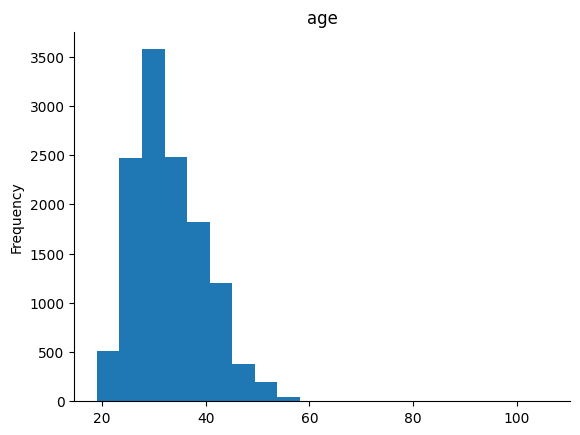

In [ ]:
from matplotlib import pyplot as plt
data['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
len(data['city'].unique()) # типо можно как-то взять инфу по городу (среднюю зарплату для этой позиции) и учитывать (мб тупо и не нужно)

453

In [ ]:
data.shape

(12673, 9)

In [ ]:
data.iloc[200]['position'] # куда собесился (но чето без грейда, в основном, просто: "ios developer" и все)

'Android Developer'

In [ ]:
data.iloc[0]['key_skills']

'Анализ требований, Разработка ТЗ, Управление требованиями к ПО, Ручное тестирование, UML, SQL, Figma Design'

In [ ]:
data.iloc[250]['client_name'] # направления, куда собесился чел (группа работодателей)

'ТОП Финтех'

In [ ]:
# нужно найти инфу по этим компаниям и учитывать ее (новых компаний не будет, так как был ответ в тг про out of train)
data['client_name'].unique() # видим яндекс - берем сто проц, это легенда

array(['ТОП Финтех', 'ТОП IT (сервисы, интеграторы)', 'ТОП Телеком',
       'X5 Group', 'Черкизово', 'BIOCAD', 'Hoff', 'Яндекс Райдтех',
       'Крок', 'Nebius', 'Click2Money', 'Pay365', 'OZON', 'РСХБ',
       'Хеликон', 'Cloud.ru', 'Самолёт', 'Яндекс Маркет', 'Яндекс.Cloud',
       'ТОП eCOM', 'IVI', 'Banki.ru', '585 RPO', 'Сбер Еаптека',
       'Информзащита', 'Казино NDA', 'Onpoint', 'Food Rocket', 'Hawex',
       'Loymax', 'EggHeads', 'Брусника', 'Amdocs', 'ЮЛаки', 'Fun&Sun',
       'nil.foundation', 'Brand Analytics', 'М.Видео – Эльдорадо',
       'Equifax', 'Mercury', 'Прочее', 'МТС Банк (Аутсорс)',
       'МТС (Аутсорс)', 'Хантфлоу', "Papa John's", 'Национальная Лотерея',
       'ЛитРес', 'InDrive', 'Просвещение', 'Совкомбанк',
       'Национальная Медиа Группа (МСБ)', 'ЦБ РФ', 'SRG Group', 'Этнамед',
       'Usetech', 'Яндекс. Такси', 'АО Азот-Взрыв', 'Glue up',
       'PIM Solutions', 'Metaship', 'Sitronics', '4 Лапы', 'Ингосстрах',
       'Nestle', 'Auxo', 'Айтуби', 'Sunlight

In [ ]:
data.iloc[100]['salary']

'Рассматривает предложения от 180 тыс. net в окладной части.    От 200 тыс. руб на руки. Итоговую сумму готов обсудить на собеседовании.    От 200 тыс. руб на руки. Итоговую сумму готов обсудить на собеседовании.'

In [ ]:
# тут все примеры повторяются жестко
print(data.iloc[100]['work_experience']) # Надо вытаскивать даты и считать по ним количество лет опыта, умноженное на грейд (типо стажер - 1, джун - 2)

2018-04-01 - 2018-11-01: Начальник отдела разработки ПО   Распределение и контроль за выполнением задач и проектов. Разработка ТЗ.   Разработка и внедрение решений под различные конфигурации на платформе 1С.  
2018-04-01 - 2018-11-01: Начальник отдела разработки ПО   Распределение и контроль за выполнением задач и проектов. Разработка ТЗ.   Разработка и внедрение решений под различные конфигурации на платформе 1С.  
2018-04-01 - 2018-11-01: Начальник отдела разработки ПО   Распределение и контроль за выполнением задач и проектов. Разработка ТЗ.   Разработка и внедрение решений под различные конфигурации на платформе 1С.  
2018-04-01 - 2018-11-01: Начальник отдела разработки ПО   Распределение и контроль за выполнением задач и проектов. Разработка ТЗ.   Разработка и внедрение решений под различные конфигурации на платформе 1С.  
2018-04-01 - 2018-11-01: Начальник отдела разработки ПО   Распределение и контроль за выполнением задач и проектов. Разработка ТЗ.   Разработка и внедрение реше

In [ ]:
print('position: ', data['position'].values.tolist().count(''))
print('age: ', data['age'].values.tolist().count(''))
print('country: ', data['country'].values.tolist().count(''))
print('city: ', data['city'].values.tolist().count(''))
print('key_skills: ', data['key_skills'].values.tolist().count(''))
print('client_name: ', data['client_name'].values.tolist().count(''))
print('grade_proof: ', data['grade_proof'].values.tolist().count(''))
print('salary: ', data['salary'].values.tolist().count(''))
print('work_experience: ', data['work_experience'].values.tolist().count(''))

position:  0
age:  0
country:  18
city:  237
key_skills:  480
client_name:  0
grade_proof:  0
salary:  5100
work_experience:  0


In [ ]:
print('position: ', data['position'].values.tolist().count('.'))
print('age: ', data['age'].values.tolist().count('.'))
print('country: ', data['country'].values.tolist().count('.'))
print('city: ', data['city'].values.tolist().count('.'))
print('key_skills: ', data['key_skills'].values.tolist().count('.'))
print('client_name: ', data['client_name'].values.tolist().count('.'))
print('grade_proof: ', data['grade_proof'].values.tolist().count('.'))
print('salary: ', data['salary'].values.tolist().count('.'))
print('work_experience: ', data['work_experience'].values.tolist().count('.'))

position:  2
age:  0
country:  0
city:  0
key_skills:  0
client_name:  0
grade_proof:  0
salary:  38
work_experience:  0


## Расчет рейтинга организации и ключевых навыков (client_name и key_skills)

In [ ]:
data['client_name'].unique() # Других не будет на тесте

array(['ТОП Финтех', 'ТОП IT (сервисы, интеграторы)', 'ТОП Телеком',
       'X5 Group', 'Черкизово', 'BIOCAD', 'Hoff', 'Яндекс Райдтех',
       'Крок', 'Nebius', 'Click2Money', 'Pay365', 'OZON', 'РСХБ',
       'Хеликон', 'Cloud.ru', 'Самолёт', 'Яндекс Маркет', 'Яндекс.Cloud',
       'ТОП eCOM', 'IVI', 'Banki.ru', '585 RPO', 'Сбер Еаптека',
       'Информзащита', 'Казино NDA', 'Onpoint', 'Food Rocket', 'Hawex',
       'Loymax', 'EggHeads', 'Брусника', 'Amdocs', 'ЮЛаки', 'Fun&Sun',
       'nil.foundation', 'Brand Analytics', 'М.Видео – Эльдорадо',
       'Equifax', 'Mercury', 'Прочее', 'МТС Банк (Аутсорс)',
       'МТС (Аутсорс)', 'Хантфлоу', "Papa John's", 'Национальная Лотерея',
       'ЛитРес', 'InDrive', 'Просвещение', 'Совкомбанк',
       'Национальная Медиа Группа (МСБ)', 'ЦБ РФ', 'SRG Group', 'Этнамед',
       'Usetech', 'Яндекс. Такси', 'АО Азот-Взрыв', 'Glue up',
       'PIM Solutions', 'Metaship', 'Sitronics', '4 Лапы', 'Ингосстрах',
       'Nestle', 'Auxo', 'Айтуби', 'Sunlight

Собираем инфу о компаниях по таким критериям и выделяем новые фичи:
1. Количество работников (1 - до 100 человек, 2 - 100–1000 человек, 3 - 1000–10000 человек, 4 - 10000 - 50000 человек, 5 - 50000 - 100000 человек, 6 - 100000+)
3. Количество открытых вакансий  (1 - до 50 вакансий, 2 - 50-500 человек, 3 - 500-5000 человек, 4 - 5000-10000 человек, 5 - 10000-20000 человек, 6 - 20000+)
4. Выручка компании
5. Возраст компании
6. Текучесть кадров

In [ ]:
data['client_name'].unique().shape

(70,)

In [ ]:
# Количество работников (1 - до 100 человек, 2 - 100–1000 человек, 3 - 1000–10000 человек, 4 - 10000 - 50000 человек, 5 - 50000 - 100000 человек, 6 - 100000+)
preprocessed_companies_employee_count = {
    'ТОП Финтех': 6, 'ТОП IT (сервисы, интеграторы)': 6, 'ТОП Телеком': 6,
    'X5 Group': 6, 'Черкизово': 4, 'BIOCAD': 3, 'Hoff': 3, 'Яндекс Райдтех': 4,
    'Крок': 3, 'Nebius': 4, 'Click2Money': 1, 'Pay365': 1, 'OZON': 4,
    'РСХБ': 4, 'Хеликон': 2, 'Cloud.ru': 3, 'Самолёт': 3, 'Яндекс Маркет': 4,
    'Яндекс.Cloud': 4, 'ТОП eCOM': 6, 'IVI': 2, 'Banki.ru': 2, '585 RPO': 3,
    'Сбер Еаптека': 3, 'Информзащита': 1, 'Казино NDA': 2, 'Onpoint': 1, 'Food Rocket': 1,
    'Hawex': 1, 'Loymax': 2, 'EggHeads': 2, 'Брусника': 1, 'Amdocs': 4,
    'ЮЛаки': 1, 'Fun&Sun': 5, 'nil.foundation': 1, 'Brand Analytics': 1, 'М.Видео – Эльдорадо': 4,
    'Equifax': 3, 'Mercury': 2, 'Прочее': 1, 'МТС Банк (Аутсорс)': 5, 'МТС (Аутсорс)': 5,
    'Хантфлоу': 1, "Papa John's": 4, 'Национальная Лотерея': 3, 'ЛитРес': 2, 'InDrive': 3,
    'Просвещение': 3, 'Совкомбанк': 4, 'Национальная Медиа Группа (МСБ)': 1, 'ЦБ РФ': 4, 'SRG Group': 2,
    'Этнамед': 1, 'Usetech': 2, 'Яндекс. Такси': 4, 'АО Азот-Взрыв': 2, 'Glue up': 2,
    'PIM Solutions': 1, 'Metaship': 1, 'Sitronics': 3, '4 Лапы': 1, 'Ингосстрах': 3,
    'Nestle': 6, 'Auxo': 3, 'Айтуби': 1, 'Sunlight': 3, 'Air Liquide': 5,
    'Т2': 3, 'Яндекс Академия': 4,
}

In [ ]:
# Количество открытых вакансий (1 - до 50 вакансий, 2 - 50-500 человек, 3 - 500-5000 человек, 4 - 5000-10000 человек, 5 - 10000-20000 человек, 6 - 20000+)
preprocessed_companies_employee_count = {
    'ТОП Финтех': 6, 'ТОП IT (сервисы, интеграторы)': 6, 'ТОП Телеком': 6,
    'X5 Group': 6, 'Черкизово': 4, 'BIOCAD': 3, 'Hoff': 3, 'Яндекс Райдтех': 4,
    'Крок': 3, 'Nebius': 4, 'Click2Money': 1, 'Pay365': 1, 'OZON': 4,
    'РСХБ': 4, 'Хеликон': 2, 'Cloud.ru': 3, 'Самолёт': 3, 'Яндекс Маркет': 4,
    'Яндекс.Cloud': 4, 'ТОП eCOM': 6, 'IVI': 2, 'Banki.ru': 2, '585 RPO': 3,
    'Сбер Еаптека': 4, 'Информзащита': 1, 'Казино NDA': 1, 'Onpoint': 1, 'Food Rocket': 1,
    'Hawex': 1, 'Loymax': 2, 'EggHeads': 2, 'Брусника': 1, 'Amdocs': 4,
    'ЮЛаки': 1, 'Fun&Sun': 5, 'nil.foundation': 1, 'Brand Analytics': 1, 'М.Видео – Эльдорадо': 4,
    'Equifax': 2, 'Mercury': 2, 'Прочее': 1, 'МТС Банк (Аутсорс)': 5, 'МТС (Аутсорс)': 5,
    'Хантфлоу': 1, "Papa John's": 4, 'Национальная Лотерея': 3, 'ЛитРес': 2, 'InDrive': 3,
    'Просвещение': 3, 'Совкомбанк': 4, 'Национальная Медиа Группа (МСБ)': 1, 'ЦБ РФ': 4, 'SRG Group': 2,
    'Этнамед': 1, 'Usetech': 2, 'Яндекс. Такси': 4, 'АО Азот-Взрыв': 2, 'Glue up': 2,
    'PIM Solutions': 1, 'Metaship': 1, 'Sitronics': 3, '4 Лапы': 1, 'Ингосстрах': 3,
    'Nestle': 5, 'Auxo': 3, 'Айтуби': 1, 'Sunlight': 2, 'Air Liquide': 5,
    'Т2': 3, 'Яндекс Академия': 4,
}

In [ ]:
# Выручка компании
preprocessed_companies_employee_count = {
    'ТОП Финтех': 6, 'ТОП IT (сервисы, интеграторы)': 6, 'ТОП Телеком': 6,
    'X5 Group': 6, 'Черкизово': 4, 'BIOCAD': 3, 'Hoff': 3, 'Яндекс Райдтех': 5,
    'Крок': 3, 'Nebius': 4, 'Click2Money': 1, 'Pay365': 1, 'OZON': 5,
    'РСХБ': 3, 'Хеликон': 2, 'Cloud.ru': 3, 'Самолёт': 3, 'Яндекс Маркет': 5,
    'Яндекс.Cloud': 5, 'ТОП eCOM': 6, 'IVI': 2, 'Banki.ru': 2, '585 RPO': 3,
    'Сбер Еаптека': 5, 'Информзащита': 1, 'Казино NDA': 1, 'Onpoint': 1, 'Food Rocket': 1,
    'Hawex': 1, 'Loymax': 2, 'EggHeads': 2, 'Брусника': 1, 'Amdocs': 4,
    'ЮЛаки': 1, 'Fun&Sun': 5, 'nil.foundation': 1, 'Brand Analytics': 1, 'М.Видео – Эльдорадо': 4,
    'Equifax': 1, 'Mercury': 2, 'Прочее': 1, 'МТС Банк (Аутсорс)': 5, 'МТС (Аутсорс)': 5,
    'Хантфлоу': 1, "Papa John's": 4, 'Национальная Лотерея': 3, 'ЛитРес': 3, 'InDrive': 3,
    'Просвещение': 3, 'Совкомбанк': 4, 'Национальная Медиа Группа (МСБ)': 1, 'ЦБ РФ': 4, 'SRG Group': 2,
    'Этнамед': 1, 'Usetech': 2, 'Яндекс. Такси': 5, 'АО Азот-Взрыв': 2, 'Glue up': 2,
    'PIM Solutions': 1, 'Metaship': 1, 'Sitronics': 2, '4 Лапы': 2, 'Ингосстрах': 3,
    'Nestle': 6, 'Auxo': 3, 'Айтуби': 1, 'Sunlight': 2, 'Air Liquide': 6,
    'Т2': 3, 'Яндекс Академия': 5,
}

In [ ]:
# Возраст компании
preprocessed_companies_employee_count = {
    'ТОП Финтех': 6, 'ТОП IT (сервисы, интеграторы)': 6, 'ТОП Телеком': 6,
    'X5 Group': 6, 'Черкизово': 3, 'BIOCAD': 2, 'Hoff': 3, 'Яндекс Райдтех': 5,
    'Крок': 3, 'Nebius': 1, 'Click2Money': 1, 'Pay365': 1, 'OZON': 5,
    'РСХБ': 2, 'Хеликон': 1, 'Cloud.ru': 3, 'Самолёт': 4, 'Яндекс Маркет': 5,
    'Яндекс.Cloud': 5, 'ТОП eCOM': 6, 'IVI': 4, 'Banki.ru': 3, '585 RPO': 2,
    'Сбер Еаптека': 5, 'Информзащита': 2, 'Казино NDA': 1, 'Onpoint': 1, 'Food Rocket': 1,
    'Hawex': 1, 'Loymax': 1, 'EggHeads': 1, 'Брусника': 1, 'Amdocs': 1,
    'ЮЛаки': 1, 'Fun&Sun': 5, 'nil.foundation': 1, 'Brand Analytics': 1, 'М.Видео – Эльдорадо': 4,
    'Equifax': 2, 'Mercury': 1, 'Прочее': 1, 'МТС Банк (Аутсорс)': 4, 'МТС (Аутсорс)': 4,
    'Хантфлоу': 2, "Papa John's": 3, 'Национальная Лотерея': 4, 'ЛитРес': 3, 'InDrive': 2,
    'Просвещение': 3, 'Совкомбанк': 4, 'Национальная Медиа Группа (МСБ)': 1, 'ЦБ РФ': 3, 'SRG Group': 2,
    'Этнамед': 6, 'Usetech': 6, 'Яндекс. Такси': 3, 'АО Азот-Взрыв': 6, 'Glue up': 6,
    'PIM Solutions': 1, 'Metaship': 1, 'Sitronics': 2, '4 Лапы': 2, 'Ингосстрах': 1,
    'Nestle': 5, 'Auxo': 2, 'Айтуби': 1, 'Sunlight': 2, 'Air Liquide': 5,
    'Т2': 2, 'Яндекс Академия': 5,
}

In [ ]:
# Текучесть кадров
preprocessed_companies_employee_count = {
    'ТОП Финтех': 6, 'ТОП IT (сервисы, интеграторы)': 6, 'ТОП Телеком': 6,
    'X5 Group': 6, 'Черкизово': 4, 'BIOCAD': 3, 'Hoff': 3, 'Яндекс Райдтех': 5,
    'Крок': 3, 'Nebius': 4, 'Click2Money': 1, 'Pay365': 1, 'OZON': 5,
    'РСХБ': 3, 'Хеликон': 2, 'Cloud.ru': 3, 'Самолёт': 3, 'Яндекс Маркет': 5,
    'Яндекс.Cloud': 5, 'ТОП eCOM': 6, 'IVI': 2, 'Banki.ru': 2, '585 RPO': 3,
    'Сбер Еаптека': 5, 'Информзащита': 1, 'Казино NDA': 1, 'Onpoint': 1, 'Food Rocket': 1,
    'Hawex': 1, 'Loymax': 2, 'EggHeads': 2, 'Брусника': 1, 'Amdocs': 4,
    'ЮЛаки': 1, 'Fun&Sun': 5, 'nil.foundation': 1, 'Brand Analytics': 1, 'М.Видео – Эльдорадо': 4,
    'Equifax': 1, 'Mercury': 2, 'Прочее': 1, 'МТС Банк (Аутсорс)': 5, 'МТС (Аутсорс)': 5,
    'Хантфлоу': 1, "Papa John's": 4, 'Национальная Лотерея': 3, 'ЛитРес': 3, 'InDrive': 3,
    'Просвещение': 3, 'Совкомбанк': 4, 'Национальная Медиа Группа (МСБ)': 1, 'ЦБ РФ': 4, 'SRG Group': 2,
    'Этнамед': 1, 'Usetech': 2, 'Яндекс. Такси': 5, 'АО Азот-Взрыв': 2, 'Glue up': 2,
    'PIM Solutions': 1, 'Metaship': 1, 'Sitronics': 2, '4 Лапы': 2, 'Ингосстрах': 3,
    'Nestle': 6, 'Auxo': 3, 'Айтуби': 1, 'Sunlight': 2, 'Air Liquide': 6,
    'Т2': 3, 'Яндекс Академия': 5,
}